In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#### DATA LOADING

In [9]:
data_path = 'dataset 2/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'
data = pd.read_csv(data_path)
data.head(3)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [10]:
data[data.columns[0]].unique()

array(['192.168.10.5-104.16.207.165-54865-443-6',
       '192.168.10.5-104.16.28.216-55054-80-6',
       '192.168.10.5-104.16.28.216-55055-80-6', ...,
       '192.168.10.3-192.168.10.8-445-10414-6',
       '192.168.10.3-192.168.10.8-53-51617-17',
       '192.168.10.8-72.21.81.253-10398-443-6'], dtype=object)

In [11]:
data.tail(3)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
225742,192.168.10.15-72.21.91.29-61375-80-6,72.21.91.29,80,192.168.10.15,61375,6,7/7/2017 5:02,75,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,192.168.10.15-8.41.222.187-61323-80-6,8.41.222.187,80,192.168.10.15,61323,6,7/7/2017 5:02,48,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225744,192.168.10.15-8.43.72.21-61326-80-6,8.43.72.21,80,192.168.10.15,61326,6,7/7/2017 5:02,68,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [12]:
data.sample(3)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
79871,172.16.0.1-192.168.10.50-23967-80-6,172.16.0.1,23967,192.168.10.50,80,6,7/7/2017 4:03,770602,3,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS
214570,178.255.83.1-192.168.10.15-80-60828-6,192.168.10.15,60828,178.255.83.1,80,6,7/7/2017 4:43,138314,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
94770,172.16.0.1-192.168.10.50-61661-80-6,192.168.10.50,80,172.16.0.1,61661,6,7/7/2017 4:04,7858685,1,5,...,20,28902.0,0.0,28902,28902,7829783.0,0.0,7829783,7829783,BENIGN


#### DATA EXPLORATION

In [13]:
row , col = data.shape
print(f'ROW (Samples) : {row} \nCOL (Features) : {col}')

ROW (Samples) : 225745 
COL (Features) : 85


In [14]:
data.columns

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [15]:
data[' Label'].value_counts()

DDoS      128027
BENIGN     97718
Name:  Label, dtype: int64

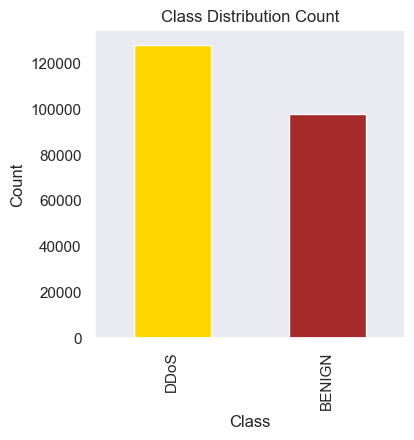

In [16]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.set_theme(style="darkgrid") 
plt.figure(figsize=(4,4))
data[' Label'].value_counts().plot(kind='bar', color=['gold', 'brown'])
plt.title('Class Distribution Count')
plt.ylabel('Count')
plt.xlabel('Class')
plt.grid()

In [17]:
# stripping columns.... 
new_col = {}
for col in data.columns: 
    new_col[col] = col.strip()

new_col

{'Flow ID': 'Flow ID',
 ' Source IP': 'Source IP',
 ' Source Port': 'Source Port',
 ' Destination IP': 'Destination IP',
 ' Destination Port': 'Destination Port',
 ' Protocol': 'Protocol',
 ' Timestamp': 'Timestamp',
 ' Flow Duration': 'Flow Duration',
 ' Total Fwd Packets': 'Total Fwd Packets',
 ' Total Backward Packets': 'Total Backward Packets',
 'Total Length of Fwd Packets': 'Total Length of Fwd Packets',
 ' Total Length of Bwd Packets': 'Total Length of Bwd Packets',
 ' Fwd Packet Length Max': 'Fwd Packet Length Max',
 ' Fwd Packet Length Min': 'Fwd Packet Length Min',
 ' Fwd Packet Length Mean': 'Fwd Packet Length Mean',
 ' Fwd Packet Length Std': 'Fwd Packet Length Std',
 'Bwd Packet Length Max': 'Bwd Packet Length Max',
 ' Bwd Packet Length Min': 'Bwd Packet Length Min',
 ' Bwd Packet Length Mean': 'Bwd Packet Length Mean',
 ' Bwd Packet Length Std': 'Bwd Packet Length Std',
 'Flow Bytes/s': 'Flow Bytes/s',
 ' Flow Packets/s': 'Flow Packets/s',
 ' Flow IAT Mean': 'Flow IAT Mea

In [18]:
# updating dataframe
data.rename(columns=new_col, inplace=True)
data.columns

Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
  

In [19]:
# checking type and null val
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Flow ID                      225745 non-null  object 
 1   Source IP                    225745 non-null  object 
 2   Source Port                  225745 non-null  int64  
 3   Destination IP               225745 non-null  object 
 4   Destination Port             225745 non-null  int64  
 5   Protocol                     225745 non-null  int64  
 6   Timestamp                    225745 non-null  object 
 7   Flow Duration                225745 non-null  int64  
 8   Total Fwd Packets            225745 non-null  int64  
 9   Total Backward Packets       225745 non-null  int64  
 10  Total Length of Fwd Packets  225745 non-null  int64  
 11  Total Length of Bwd Packets  225745 non-null  int64  
 12  Fwd Packet Length Max        225745 non-null  int64  
 13 

In [20]:
data.columns[:2]

Index(['Flow ID', 'Source IP'], dtype='object')

In [21]:
data[data.columns[0]].values

array(['192.168.10.5-104.16.207.165-54865-443-6',
       '192.168.10.5-104.16.28.216-55054-80-6',
       '192.168.10.5-104.16.28.216-55055-80-6', ...,
       '192.168.10.15-72.21.91.29-61375-80-6',
       '192.168.10.15-8.41.222.187-61323-80-6',
       '192.168.10.15-8.43.72.21-61326-80-6'], dtype=object)

In [22]:
data[data.columns[:2]]

,Flow ID,Source IP
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102
...,...,...
225740,192.168.10.15-72.21.91.29-61374-80-6,72.21.91.29
225741,192.168.10.15-72.21.91.29-61378-80-6,72.21.91.29
225742,192.168.10.15-72.21.91.29-61375-80-6,72.21.91.29
225743,192.168.10.15-8.41.222.187-61323-80-6,8.41.222.187


In [23]:
data.Label.unique()

array(['BENIGN', 'DDoS'], dtype=object)

In [24]:
print(data.isnull().sum().sum())
print(data.isnull().sum().sum())

4
4


In [25]:
data = data[data['Flow Bytes/s'].isnull() == False]
data

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,7/7/2017 3:30,34,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,192.168.10.15-72.21.91.29-61374-80-6,72.21.91.29,80,192.168.10.15,61374,6,7/7/2017 5:02,61,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,192.168.10.15-72.21.91.29-61378-80-6,72.21.91.29,80,192.168.10.15,61378,6,7/7/2017 5:02,72,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,192.168.10.15-72.21.91.29-61375-80-6,72.21.91.29,80,192.168.10.15,61375,6,7/7/2017 5:02,75,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,192.168.10.15-8.41.222.187-61323-80-6,8.41.222.187,80,192.168.10.15,61323,6,7/7/2017 5:02,48,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [26]:
# dropping nan columns
# data = data[data['Flow Bytes/s'].isnull() == False]
data.shape

(225741, 85)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225741 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Flow ID                      225741 non-null  object 
 1   Source IP                    225741 non-null  object 
 2   Source Port                  225741 non-null  int64  
 3   Destination IP               225741 non-null  object 
 4   Destination Port             225741 non-null  int64  
 5   Protocol                     225741 non-null  int64  
 6   Timestamp                    225741 non-null  object 
 7   Flow Duration                225741 non-null  int64  
 8   Total Fwd Packets            225741 non-null  int64  
 9   Total Backward Packets       225741 non-null  int64  
 10  Total Length of Fwd Packets  225741 non-null  int64  
 11  Total Length of Bwd Packets  225741 non-null  int64  
 12  Fwd Packet Length Max        225741 non-null  int64  
 13 

In [28]:
for col in data.columns: 
    if data[col].dtype == 'object': 
        data[col] = data[col].astype('category').cat.codes

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225741 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Flow ID                      225741 non-null  int32  
 1   Source IP                    225741 non-null  int16  
 2   Source Port                  225741 non-null  int64  
 3   Destination IP               225741 non-null  int16  
 4   Destination Port             225741 non-null  int64  
 5   Protocol                     225741 non-null  int64  
 6   Timestamp                    225741 non-null  int8   
 7   Flow Duration                225741 non-null  int64  
 8   Total Fwd Packets            225741 non-null  int64  
 9   Total Backward Packets       225741 non-null  int64  
 10  Total Length of Fwd Packets  225741 non-null  int64  
 11  Total Length of Bwd Packets  225741 non-null  int64  
 12  Fwd Packet Length Max        225741 non-null  int64  
 13 

In [29]:
data.Label.unique()

array([0, 1], dtype=int8)

In [30]:
data.duplicated().sum()

2

In [31]:
data.drop_duplicates(keep='first', inplace=True)
data.shape

(225739, 85)

In [32]:
print(np.isinf(data).sum().sum())

60


In [33]:
for col in data.columns: 
    if np.isinf(data[col]).sum() > 0:
        print(col, ' : ' , np.isinf(data[col]).sum())

Flow Bytes/s  :  30
Flow Packets/s  :  30


In [34]:
data = data[np.isinf(data['Flow Bytes/s']) != True]
data = data[np.isinf(data['Flow Packets/s']) != True]
data.shape

(225709, 85)

In [35]:
for col in data.columns: 
    if data[col].dtype == 'float64': 
        data[col] = data[col].astype('int32')
        print(data[col].unique())

[   6   18   14    0  124   84   37    8 1326  308    1   11   43   42
   27   46  280   39   34   73   35   40   32   36   64   66   28   29
   50   26   25   55   30   31   61   20   53   48   38   58  146   33
  129   19   97   80  103   45   23   81   22  565   96   47   41  135
   82   60   54   52   56   59   51   65   49   74   78   62   57   44
   75   77   94   79   71  145    4  136  140  154  105  125  250  160
  143  101  107   89   72  130   70   92  675  195  147    2  364  203
  210  221  117   21  274  199  222  300  266  119  114   63   67   83
   68  298  113  193  120  150  192  256  118  141  108  167   93  165
   90  131  148  543  144  109 1254  149  189  226  238  186  292   88
  272  365  134  166  164   91   85  126   86   99  346   87   16   15
 2097 1797 2101 2016 2216 2075 2258 2091 1448 2129 1947 1703 1991 2131
 2147   12  713  891  804  877  807  730  175  188  666  324   95  155
   69  151    3  257  304  142  122  139  340  410  369  279  349  667
  110 

In [37]:
X, y  = data.drop(columns=['Label']) , data.Label
X.shape

(225709, 84)

In [38]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler to scale data to [0,1]
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform training data
X_scalled = scaler.fit_transform(X)
X_scalled

array([[0.96025226, 0.0106486 , 0.00675985, ..., 0.        , 0.        ,
        0.        ],
       [0.96062254, 0.017909  , 0.00122074, ..., 0.        , 0.        ,
        0.        ],
       [0.96063411, 0.017909  , 0.00122074, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.65685027, 0.93175218, 0.00122074, ..., 0.        , 0.        ,
        0.        ],
       [0.65790326, 0.95982575, 0.00122074, ..., 0.        , 0.        ,
        0.        ],
       [0.65798426, 0.96127783, 0.00122074, ..., 0.        , 0.        ,
        0.        ]])

In [39]:
X_scalled.shape

(225709, 84)

In [40]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scalled, y)

In [41]:
X_resampled

array([[0.96025226, 0.0106486 , 0.00675985, ..., 0.        , 0.        ,
        0.        ],
       [0.96062254, 0.017909  , 0.00122074, ..., 0.        , 0.        ,
        0.        ],
       [0.96063411, 0.017909  , 0.00122074, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.99443084, 0.72053186, 0.00675985, ..., 0.        , 0.        ,
        0.        ],
       [0.50127599, 0.34027106, 0.00122074, ..., 0.        , 0.64503228,
        0.64503228],
       [0.84427022, 0.33736689, 0.82013309, ..., 0.        , 0.        ,
        0.        ]])

In [42]:
y_resampled.value_counts()

0    128025
1    128025
Name: Label, dtype: int64

<Figure size 400x400 with 0 Axes>

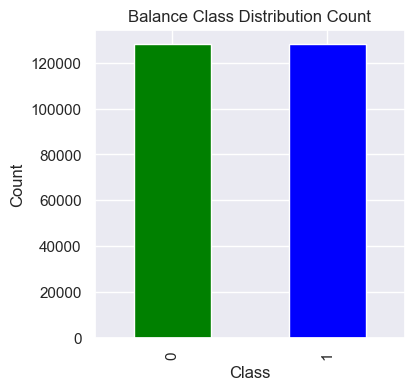

In [43]:
import seaborn as sn 
from matplotlib import pyplot as plt
plt.figure(figsize=(4,4))
sn.set_style(style='darkgrid')
plt.figure(figsize=(4,4))
y_resampled.value_counts().plot(kind='bar', color=['green', 'blue'])
plt.title('Balance Class Distribution Count')
plt.ylabel('Count')
plt.xlabel('Class')
plt.grid()
plt.grid()


In [44]:
y_resampled.value_counts()

0    128025
1    128025
Name: Label, dtype: int64

In [45]:
# machine learning developement

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [46]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, shuffle=True)
X_train.shape

(204840, 84)

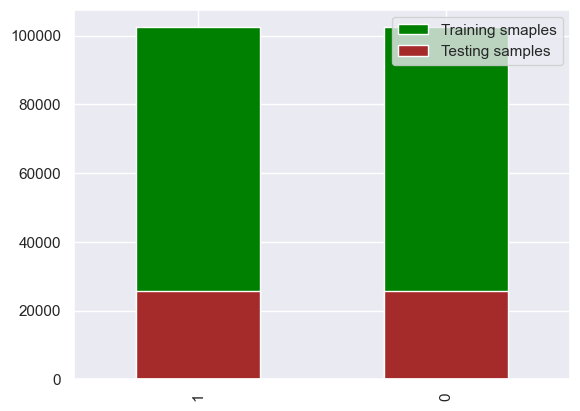

In [60]:
# confirming if the training the testing sample is balance 
y_train.value_counts().plot(kind='bar', color=['green', 'green'])
y_test.value_counts().plot(kind='bar', color=['brown', 'brown'])
plt.legend(labels=['Training smaples', 'Testing samples'])

In [47]:
X_test

array([[0.34177274, 0.20619555, 0.64632099, ..., 0.        , 0.05905705,
        0.05905705],
       [0.54493173, 0.34172314, 0.13950011, ..., 0.14665389, 0.485     ,
        0.37166667],
       [0.60258042, 0.33591481, 0.64528336, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.36926637, 0.20619555, 0.7734611 , ..., 0.        , 0.        ,
        0.        ],
       [0.83044434, 0.33736689, 0.19890439, ..., 0.        , 0.        ,
        0.        ],
       [0.51171025, 0.20619555, 0.96127201, ..., 0.        , 0.        ,
        0.        ]])

In [48]:
# building the architecutre


# Initialize the RBM model
rbm_layer = BernoulliRBM(n_components=256, learning_rate=0.01, n_iter=5, verbose=1)
rbm_layer

BernoulliRBM(learning_rate=0.01, n_iter=5, verbose=1)

In [49]:
# Initialize the logistic regression model
lr_model = LogisticRegression(max_iter=100, solver="liblinear")
lr_model

LogisticRegression(solver='liblinear')

In [50]:
# layer pipeline
# classifies with logistic regression
dbn_pipeline = Pipeline(steps=[('layer_1', rbm_layer), ('output_layer', lr_model)])
dbn_pipeline

Pipeline(steps=[('layer_1',
                 BernoulliRBM(learning_rate=0.01, n_iter=5, verbose=1)),
                ('output_layer', LogisticRegression(solver='liblinear'))])

In [51]:
import warnings 
warnings.filterwarnings('ignore')

In [52]:
history = dbn_pipeline.fit(X_train, y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -10.36, time = 19.03s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -9.74, time = 27.19s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -9.50, time = 24.89s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -9.51, time = 23.35s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -9.62, time = 22.92s


In [53]:
pred = dbn_pipeline.predict(X_test)
pred[:20]

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1],
      dtype=int8)

In [54]:
dbn_pipeline.predict(X_test)

array([1, 0, 0, ..., 1, 0, 1], dtype=int8)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     25605
           1       0.98      1.00      0.99     25605

    accuracy                           0.99     51210
   macro avg       0.99      0.99      0.99     51210
weighted avg       0.99      0.99      0.99     51210



In [56]:
# using multiple layers of BRM

In [51]:
## Define three RBM layers
rbm_layer1 = BernoulliRBM(n_components=512, learning_rate=0.01, n_iter=5, verbose=1)
rbm_layer2 = BernoulliRBM(n_components=256, learning_rate=0.01, n_iter=5, verbose=1)
rbm_layer3 = BernoulliRBM(n_components=128, learning_rate=0.01, n_iter=5, verbose=1)

# Train first RBM layer
print("Training RBM Layer 1...")
x_train_rbm1 = rbm_layer1.fit_transform(X_train)

# Train second RBM layer on RBM1 output
print("Training RBM Layer 2...")
x_train_rbm2 = rbm_layer2.fit_transform(x_train_rbm1)

# Train third RBM layer on RBM2 output
print("Training RBM Layer 3...")
x_train_rbm3 = rbm_layer3.fit_transform(x_train_rbm2)


Training RBM Layer 1...
[BernoulliRBM] Iteration 1, pseudo-likelihood = -10.19, time = 18.89s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -9.93, time = 28.22s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -9.87, time = 27.99s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -9.90, time = 27.90s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -11.61, time = 28.19s
Training RBM Layer 2...
[BernoulliRBM] Iteration 1, pseudo-likelihood = -296.74, time = 41.52s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -296.93, time = 47.30s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -296.51, time = 46.01s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -296.64, time = 45.20s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -296.95, time = 45.11s
Training RBM Layer 3...
[BernoulliRBM] Iteration 1, pseudo-likelihood = -1.21, time = 11.89s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -0.93, time = 14.31s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -0.75, time = 14.12s
[BernoulliRBM] Iter

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train a classifier on top of the final RBM output
classifier = LogisticRegression(max_iter=1000, solver="liblinear")
classifier.fit(x_train_rbm3, y_train)

# Transform test data using trained RBMs
x_test_rbm1 = rbm_layer1.transform(X_test)
x_test_rbm2 = rbm_layer2.transform(x_test_rbm1)
x_test_rbm3 = rbm_layer3.transform(x_test_rbm2)

# Predict on test data
y_pred = classifier.predict(x_test_rbm3)
accuracy = accuracy_score(y_test, y_pred)

print(f"DBN Test Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

DBN Test Accuracy: 96.81%
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     25651
           1       0.94      1.00      0.97     25559

    accuracy                           0.97     51210
   macro avg       0.97      0.97      0.97     51210
weighted avg       0.97      0.97      0.97     51210



In [ ]:
# using only logistic regression

In [44]:
# Train a classifier on top of the final RBM output
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [54]:
pre = classifier.predict(X_test)
pre

array([1, 0, 0, ..., 0, 1, 1], dtype=int8)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25651
           1       1.00      1.00      1.00     25559

    accuracy                           1.00     51210
   macro avg       1.00      1.00      1.00     51210
weighted avg       1.00      1.00      1.00     51210



In [65]:
# Initialize the RBM model
input_layer = BernoulliRBM(n_components=84, learning_rate=0.01, n_iter=4, verbose=1)
layer_one = BernoulliRBM(n_components=128, learning_rate=0.01, n_iter=4, verbose=1)
layer_two = BernoulliRBM(n_components=256, learning_rate=0.01, n_iter=4, verbose=1)
layer_three = BernoulliRBM(n_components=256, learning_rate=0.01, n_iter=4, verbose=1)
layer_three

BernoulliRBM(learning_rate=0.01, n_iter=4, verbose=1)

In [ ]:
# rbn = rbm_layer.fit_transform(X_train, y_train)

In [67]:
# layer 1
f1 = input_layer.fit(X_train) 
feature1 = f1.transform(X_train)

# layer 2
f2 = layer_one.fit(feature1)
feature2 = f2.transform(feature1)

# layer 3 
f3 = layer_two.fit(feature2)
final_feature = f3.transform(feature2)

final_feature

[BernoulliRBM] Iteration 1, pseudo-likelihood = -10.33, time = 16.50s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -9.71, time = 16.46s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -9.50, time = 20.47s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -9.37, time = 19.15s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -37.31, time = 19.60s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -36.97, time = 24.29s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -37.22, time = 24.07s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -36.95, time = 24.03s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -25.02, time = 62.16s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -25.45, time = 74.76s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -25.41, time = 72.80s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -25.35, time = 70.56s


array([[0.33113243, 0.20527922, 0.25633481, ..., 0.54493904, 0.22406033,
        0.16518311],
       [0.31712518, 0.2792104 , 0.31101651, ..., 0.24537091, 0.21570268,
        0.14822052],
       [0.08919955, 0.29132815, 0.220611  , ..., 0.22706327, 0.32356131,
        0.14680515],
       ...,
       [0.37317987, 0.2477149 , 0.29231614, ..., 0.18469554, 0.19546884,
        0.08260935],
       [0.31761306, 0.27938197, 0.31121281, ..., 0.24616924, 0.21606219,
        0.1486756 ],
       [0.33355745, 0.20557632, 0.25712348, ..., 0.54277911, 0.22372173,
        0.1656559 ]])

In [68]:
# Train a classifier on top of the final RBM output
classifier = LogisticRegression(max_iter=1000)
classifier.fit(final_feature, y_train)

LogisticRegression(max_iter=1000)

In [62]:
# transformining the text sample 
t1 = f1.transform(X_test)
t2 = f2.transform(t1)
final_vector = f3.transform(t2)
final_vector

array([[0.53153267, 0.17729428, 0.35290229, ..., 0.07372315, 0.24885112,
        0.16304786],
       [0.7926563 , 0.14598879, 0.31033949, ..., 0.04836873, 0.25672272,
        0.13154802],
       [0.65167789, 0.38454858, 0.23314115, ..., 0.44685598, 0.23209789,
        0.28133623],
       ...,
       [0.79561881, 0.14695563, 0.31176853, ..., 0.04912365, 0.2574961 ,
        0.13282532],
       [0.53209771, 0.17715128, 0.352885  , ..., 0.07363808, 0.24883547,
        0.16296598],
       [0.00799695, 0.60217941, 0.16277793, ..., 0.20782607, 0.15164008,
        0.27574083]])

In [64]:
# prediction
prediction = classifier.predict(final_vector)
prediction

array([1, 0, 0, ..., 0, 1, 1], dtype=int8)

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score
print(accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))

0.9679945323179067
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     25651
           1       0.94      1.00      0.97     25559

    accuracy                           0.97     51210
   macro avg       0.97      0.97      0.97     51210
weighted avg       0.97      0.97      0.97     51210



In [ ]:
# # using pipeline to visualize the DBN Architecture.... 
# arch_list = []
# for item in range(len(dbn.layers_objects)):
#     arch_list.append((f'layer_{item+1}', dbn.layers_objects[item]))

# arch_summary = Pipeline(
#     arch_list
# )

# arch_summary

In [70]:
!pip install pyswarms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 7.1 MB/s eta 0:00:00


In [57]:
import numpy as np
import pyswarms as ps
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score,f1_score
import seaborn as sn
import random
import time
import warnings

warnings.filterwarnings('ignore')

#### METRIC HELPER METHOD

In [58]:
def compute_metrics(tp, fp, fn, tn, avg_detection_time=None):
    """
    Compute performance metrics based on the confusion matrix values.
    Args:
        tp (int): True Positives,   fp (int): False Positives
        fn (int): False Negatives,  tn (int): True Negatives
        avg_detection_time (float, optional): Average detection time in seconds. Defaults to None.
"""

    
    # Safety check to prevent division by zero
    total = tp + fp + fn + tn
    positive = tp + fn
    negative = tn + fp

    # Metrics calculations
    tpr = tp / positive if positive > 0 else 0  # True Positive Rate (Recall)
    fpr = fp / negative if negative > 0 else 0  # False Positive Rate
    fnr = fn / positive if positive > 0 else 0  # False Negative Rate
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tpr  # Recall is the same as TPR
    specificity = tn / negative if negative > 0 else 0
    accuracy = (tp + tn) / total if total > 0 else 0

    # Pack into dictionary
    metrics = {
        "TPR (Recall)": tpr,
        "FPR": fpr,
        "FNR": fnr,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "Specificity": specificity,
        "AVG EXE TIME": f'{avg_detection_time:.8f}'
    }

    return metrics  

#### PSO ALGORITHM OPTIMIZATION (BEST DEEP LAYER SELECTOR)

In [96]:

# Custom DBN Class (varying number of RBM stacks)
class DBNClassifier(BaseEstimator, TransformerMixin):
    def __init__(self, num_rbms=2, learning_rate=0.01, n_iter=4):
        self.num_rbms = num_rbms
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.pipeline = None

    def fit(self, X, y):
        layers = []
        rbm_sizes = [128, 256, 512]  # Fixed RBM sizes

        for i in range(self.num_rbms):
            layers.append(("rbm" + str(i), BernoulliRBM(n_components=rbm_sizes[i], learning_rate=self.learning_rate, n_iter=self.n_iter, verbose=0)))

        layers.append(("logreg", LogisticRegression(max_iter=1000)))
        self.pipeline = Pipeline(layers)
        self.pipeline.fit(X, y)
        return self

    def predict(self, X):
        return self.pipeline.predict(X)


# Define PSO objective function (optimize num_rbms)
def objective_function(params):
    num_rbms = int(params[0])  # Number of RBMs

    if num_rbms < 1 or num_rbms > 3:  # Limit number of RBM layers
        return 1e6  # Penalize invalid solutions

    model = DBNClassifier(num_rbms=num_rbms)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return -accuracy_score(y_test, y_pred)  # PSO minimizes, so negate accuracy

# Set PSO bounds (optimize only num_rbms between 1-3)
bounds = [(4, 8)]

# PSO optimization
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=len(bounds), options={'c1': 1.5, 'c2': 1.5, 'w': 0.5}, bounds=np.array(bounds).T)

best_cost, best_num_rbms = optimizer.optimize(objective_function, iters=5)

print("Best Number of RBM Stacks:", int(best_num_rbms[0]))

2025-03-16 05:04:17,510 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}
pyswarms.single.global_best: 100%|█████████████████|5/5, best_cost=1e+6
2025-03-16 05:04:17,529 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1000000.0, best pos: [5.57937745]


Best Number of RBM Stacks: 5


#### GENETIC ALGORITHM OPTIMIZATION (BEST LEARNING RATE SELECTOR)

In [62]:
# Genetic Algorithm
# Fitness function
def fitness_function(learning_rate):
    model = DBNClassifier(learning_rate=learning_rate)
    model.fit(X_train[:10000], y_train[:10000])
    y_pred = model.predict(X_test[:10000])
    return accuracy_score(y_test[:10000], y_pred)

# Genetic Algorithm
def genetic_algorithm(pop_size=10, generations=10, mutation_rate=0.1, bounds=(0.001, 0.1)):
    # Initialize population
    population = np.random.uniform(bounds[0], bounds[1], pop_size)
    for generation in range(generations):
        # Evaluate fitness
        fitness = np.array([fitness_function(ind) for ind in population])
        # Select the best individuals
        sorted_indices = np.argsort(fitness)[::-1]
        parents = population[sorted_indices[:pop_size // 2]]
        # Crossover: Generate offspring
        offspring = []
        for _ in range(pop_size // 2):
            parent1, parent2 = random.sample(list(parents), 2)
            child = (parent1 + parent2) / 2  # Average crossover
            offspring.append(child)
        # Mutation: Apply random changes
        offspring = np.array(offspring)
        mutations = np.random.uniform(-mutation_rate, mutation_rate, size=offspring.shape)
        offspring += mutations
        offspring = np.clip(offspring, bounds[0], bounds[1])  # Ensure within bounds
        # Create the new population
        population = np.concatenate((parents, offspring))
        # Log progress
        best_individual = population[np.argmax(fitness)]
        best_fitness = max(fitness)
        print(f"Generation {generation + 1}: Best Learning Rate = {best_individual:.5f}, Accuracy = {best_fitness:.4f}")
    
    # Return the best learning rate
    best_individual = population[np.argmax(fitness)]
    return best_individual

# Run GA
best_learning_rate = genetic_algorithm()
print(f"Optimal Learning Rate: {best_learning_rate:.5f}")

Generation 1: Best Learning Rate = 0.03435, Accuracy = 0.9756
Generation 2: Best Learning Rate = 0.05521, Accuracy = 0.9695
Generation 3: Best Learning Rate = 0.03435, Accuracy = 0.9718
Generation 4: Best Learning Rate = 0.03435, Accuracy = 0.9718
Generation 5: Best Learning Rate = 0.04626, Accuracy = 0.9721
Generation 6: Best Learning Rate = 0.04626, Accuracy = 0.9723
Generation 7: Best Learning Rate = 0.03925, Accuracy = 0.9690
Generation 8: Best Learning Rate = 0.05521, Accuracy = 0.9704
Generation 9: Best Learning Rate = 0.05521, Accuracy = 0.9694
Generation 10: Best Learning Rate = 0.09549, Accuracy = 0.9649
Optimal Learning Rate: 0.09549


#### PROPOSED DBN ARCHITECTURE

In [63]:
# mergin everything...
class DBN_network: 

    def __init__(self, neurons=100, learning_rate=0.8, epoch=4): 
        self.neurons = neurons
        self.learning_rate=learning_rate 
        self.epoch = epoch
        self.layers_objects = []
        print('parameter initialize...')

    def config_network(self, neurons, layers=2, learning_rate=0.8):
        self.layers_objects = []
        if layers != len(neurons):
            print(f' Neuron List Value {len(neurons)} must equal Layer value {layers} layers')
        else: 
            for ep in range(layers): 
                # print(f' \n Epoch : {ep}')
                ly = BernoulliRBM(n_components=neurons[ep], learning_rate=learning_rate, n_iter=4, verbose=1)
                self.layers_objects.append(ly)
                # print(ly)

            # specify the classification head
            classifier = LogisticRegression(max_iter=1000)
            self.layers_objects.append(classifier)
            
   # to visualize the architecture using pipeline
    def summary(self):
        # using pipeline to visualize the DBN Architecture.... 
        arch_list = []
        for item in range(len(self.layers_objects)):
            arch_list.append((f'layer_{item+1}', self.layers_objects[item]))
        
        self.arch_summary = Pipeline(
            arch_list
        )

        print('DBN architecture Summary')
        return self.arch_summary

    # function to train the model... 
    def fit_model(self, X_train, y_train): 
        print(f'Training For {len(self.layers_objects[:-1])} Layer')
        self.fited_arch = []
        init_sample = X_train
        init_y = y_train
        count = 0 
        for layer in self.layers_objects[:-1]:
            print(f'\n *******************  EPOCH {count + 1} **********************')
            # fit and transform....  
            fited = layer.fit(init_sample)
            feature  = fited.transform(init_sample)
        
            # update weights
            init_sample = feature
        
            # store layer weights
            self.fited_arch.append(fited)
            count = count + 1
            
        # fit the classification head 
        print('\n+-----------------------------------------+')
        self.class_head = self.layers_objects[-1].fit(init_sample, init_y)
        
        return self.arch_summary

    # prediction  function 
    def predict(self, X_test, y_test): 
        init_sample = X_test
        init_y = y_test
        for layer in self.fited_arch:
            
            # transform....  
            feature  = layer.transform(init_sample)
            
            # update weights
            init_sample = feature
            print(f'Calculated Feature {init_sample.shape}')
                           
        # fit the classification head 
        if self.fited_arch != []: 
            prediction = self.class_head.predict(init_sample)
            pre = {'pre': prediction}
            return pre
        else: 
            error = 'Error: model should be trained first....'
            return {error, []}


#### DBN WITH ONE RBM STARCK

In [66]:
# initializaing DBN
dbn = DBN_network()
# configure the DBN... 
dbn.config_network([20, 42, 84, 84], layers=4, learning_rate=0.09549)

# showing the DBN architecture.. 
dbn.summary()

parameter initialize...
DBN architecture Summary


Pipeline(steps=[('layer_1',
                 BernoulliRBM(learning_rate=0.09549, n_components=20, n_iter=4,
                              verbose=1)),
                ('layer_2',
                 BernoulliRBM(learning_rate=0.09549, n_components=42, n_iter=4,
                              verbose=1)),
                ('layer_3',
                 BernoulliRBM(learning_rate=0.09549, n_components=84, n_iter=4,
                              verbose=1)),
                ('layer_4',
                 BernoulliRBM(learning_rate=0.09549, n_components=84, n_iter=4,
                              verbose=1)),
                ('layer_5', LogisticRegression(max_iter=1000))])

In [67]:
# training the arhitecture
dbn.fit_model(X_train, y_train)

Training For 4 Layer

 *******************  EPOCH 1 **********************
[BernoulliRBM] Iteration 1, pseudo-likelihood = -9.15, time = 5.04s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -11.32, time = 5.55s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -10.61, time = 4.95s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -12.70, time = 5.69s

 *******************  EPOCH 2 **********************
[BernoulliRBM] Iteration 1, pseudo-likelihood = -1.59, time = 3.89s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -1.33, time = 4.98s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -1.27, time = 4.81s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1.12, time = 4.65s

 *******************  EPOCH 3 **********************
[BernoulliRBM] Iteration 1, pseudo-likelihood = -2.04, time = 6.26s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -0.84, time = 8.92s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -14.26, time = 8.31s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -0.80, time = 8.1

Pipeline(steps=[('layer_1',
                 BernoulliRBM(learning_rate=0.09549, n_components=20, n_iter=4,
                              verbose=1)),
                ('layer_2',
                 BernoulliRBM(learning_rate=0.09549, n_components=42, n_iter=4,
                              verbose=1)),
                ('layer_3',
                 BernoulliRBM(learning_rate=0.09549, n_components=84, n_iter=4,
                              verbose=1)),
                ('layer_4',
                 BernoulliRBM(learning_rate=0.09549, n_components=84, n_iter=4,
                              verbose=1)),
                ('layer_5', LogisticRegression(max_iter=1000))])

Calculated Feature (51210, 20)
Calculated Feature (51210, 42)
Calculated Feature (51210, 84)
Calculated Feature (51210, 84)

EXE TIME
Total Detection Time : 1.559104
AVG Detection Time : 0.00003045 

              precision    recall  f1-score   support

           0       1.00      0.41      0.59     25605
           1       0.63      1.00      0.77     25605

    accuracy                           0.71     51210
   macro avg       0.82      0.71      0.68     51210
weighted avg       0.82      0.71      0.68     51210





<Axes: >

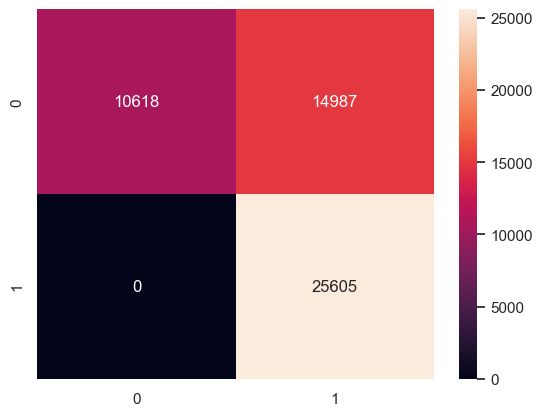

In [69]:
# make prediction
strt_time = time.time()
prediction = dbn.predict(X_test, y_test)
stop_time = time.time()

print('\nEXE TIME')
total_time  = stop_time - strt_time
avg_time = total_time / X_test.shape[0]
print(f'Total Detection Time : {total_time:.6f}')
print(f'AVG Detection Time : {avg_time:.8f} \n')

# evaluation report 
class_report = classification_report(y_test, prediction['pre'])
conf_report = confusion_matrix(y_test, prediction['pre'])
print(class_report)
print('\n')
sn.heatmap(conf_report, fmt='d', annot=True)

In [70]:
tp, fp, fn, tn = conf_report.ravel()
metrics1 = compute_metrics(tp, fp, fn, tn, avg_time)
print(metrics1)
result = pd.Series(metrics1)
result

{'TPR (Recall)': 1.0, 'FPR': 0.36921068190776507, 'FNR': 0.0, 'Accuracy': 0.7073423159539153, 'Precision': 0.4146846319078305, 'Recall': 1.0, 'Specificity': 0.6307893180922349, 'AVG EXE TIME': '0.00003045'}


TPR (Recall)           1.0
FPR               0.369211
FNR                    0.0
Accuracy          0.707342
Precision         0.414685
Recall                 1.0
Specificity       0.630789
AVG EXE TIME    0.00003045
dtype: object

In [100]:
# pd.DataFrame([row, row2])

#### DBN WITH TWO RBM STARCK

In [73]:
# initializaing DBN
dbn2 = DBN_network()
# configure the DBN... 
dbn2.config_network([20, 42, 84, 84, 256], layers=5, learning_rate=0.09549)

# showing the DBN architecture.. 
dbn2.summary()

parameter initialize...
DBN architecture Summary


Pipeline(steps=[('layer_1',
                 BernoulliRBM(learning_rate=0.09549, n_components=20, n_iter=4,
                              verbose=1)),
                ('layer_2',
                 BernoulliRBM(learning_rate=0.09549, n_components=42, n_iter=4,
                              verbose=1)),
                ('layer_3',
                 BernoulliRBM(learning_rate=0.09549, n_components=84, n_iter=4,
                              verbose=1)),
                ('layer_4',
                 BernoulliRBM(learning_rate=0.09549, n_components=84, n_iter=4,
                              verbose=1)),
                ('layer_5',
                 BernoulliRBM(learning_rate=0.09549, n_iter=4, verbose=1)),
                ('layer_6', LogisticRegression(max_iter=1000))])

In [74]:
# training the arhitecture
dbn2.fit_model(X_train, y_train)

Training For 5 Layer

 *******************  EPOCH 1 **********************
[BernoulliRBM] Iteration 1, pseudo-likelihood = -9.28, time = 8.62s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -9.58, time = 9.60s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -9.63, time = 9.94s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -14.12, time = 10.02s

 *******************  EPOCH 2 **********************
[BernoulliRBM] Iteration 1, pseudo-likelihood = -1.37, time = 8.40s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -0.78, time = 9.59s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -0.96, time = 9.48s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1.04, time = 9.94s

 *******************  EPOCH 3 **********************
[BernoulliRBM] Iteration 1, pseudo-likelihood = -0.65, time = 11.41s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -0.80, time = 14.89s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -0.92, time = 14.95s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -0.70, time = 15

Pipeline(steps=[('layer_1',
                 BernoulliRBM(learning_rate=0.09549, n_components=20, n_iter=4,
                              verbose=1)),
                ('layer_2',
                 BernoulliRBM(learning_rate=0.09549, n_components=42, n_iter=4,
                              verbose=1)),
                ('layer_3',
                 BernoulliRBM(learning_rate=0.09549, n_components=84, n_iter=4,
                              verbose=1)),
                ('layer_4',
                 BernoulliRBM(learning_rate=0.09549, n_components=84, n_iter=4,
                              verbose=1)),
                ('layer_5',
                 BernoulliRBM(learning_rate=0.09549, n_iter=4, verbose=1)),
                ('layer_6', LogisticRegression(max_iter=1000))])

Calculated Feature (51210, 20)
Calculated Feature (51210, 42)
Calculated Feature (51210, 84)
Calculated Feature (51210, 84)
Calculated Feature (51210, 256)

EXE TIME
Total Detection Time : 2.977652
AVG Detection Time : 0.00005815 

              precision    recall  f1-score   support

           0       1.00      0.76      0.86     25605
           1       0.80      1.00      0.89     25605

    accuracy                           0.88     51210
   macro avg       0.90      0.88      0.88     51210
weighted avg       0.90      0.88      0.88     51210





<Axes: >

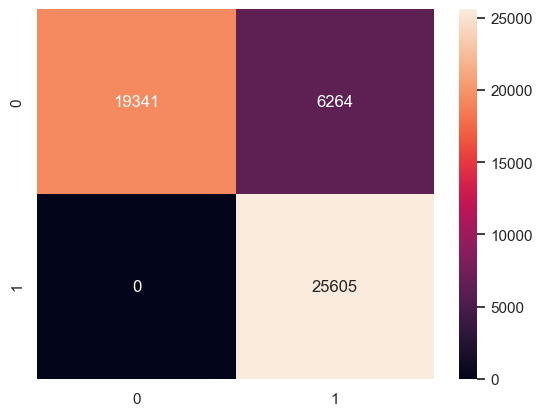

In [75]:
# make prediction
strt_time = time.time()
prediction = dbn2.predict(X_test, y_test)
stop_time = time.time()

print('\nEXE TIME')
total_time  = stop_time - strt_time
avg_time = total_time / X_test.shape[0]
print(f'Total Detection Time : {total_time:.6f}')
print(f'AVG Detection Time : {avg_time:.8f} \n')

# evaluation report 
class_report = classification_report(y_test, prediction['pre'])
conf_report = confusion_matrix(y_test, prediction['pre'])
print(class_report)
print('\n')
sn.heatmap(conf_report, fmt='d', annot=True)

In [76]:
tp, fp, fn, tn = conf_report.ravel()
metrics2 = compute_metrics(tp, fp, fn, tn, avg_time)
print(metrics2)
result2 = pd.Series(metrics2)
result2

{'TPR (Recall)': 1.0, 'FPR': 0.19655464558034452, 'FNR': 0.0, 'Accuracy': 0.8776801405975395, 'Precision': 0.755360281195079, 'Recall': 1.0, 'Specificity': 0.8034453544196555, 'AVG EXE TIME': '0.00005815'}


TPR (Recall)           1.0
FPR               0.196555
FNR                    0.0
Accuracy           0.87768
Precision          0.75536
Recall                 1.0
Specificity       0.803445
AVG EXE TIME    0.00005815
dtype: object

#### DBN WITH THREE STARCK

In [77]:
# initializaing DBN
dbn3 = DBN_network()
# configure the DBN... 
dbn3.config_network([20, 42, 84, 84, 256, 256], layers=6, learning_rate=0.09549)

# showing the DBN architecture.. 
dbn3.summary()

parameter initialize...
DBN architecture Summary


Pipeline(steps=[('layer_1',
                 BernoulliRBM(learning_rate=0.09549, n_components=20, n_iter=4,
                              verbose=1)),
                ('layer_2',
                 BernoulliRBM(learning_rate=0.09549, n_components=42, n_iter=4,
                              verbose=1)),
                ('layer_3',
                 BernoulliRBM(learning_rate=0.09549, n_components=84, n_iter=4,
                              verbose=1)),
                ('layer_4',
                 BernoulliRBM(learning_rate=0.09549, n_components=84, n_iter=4,
                              verbose=1)),
                ('layer_5',
                 BernoulliRBM(learning_rate=0.09549, n_iter=4, verbose=1)),
                ('layer_6',
                 BernoulliRBM(learning_rate=0.09549, n_iter=4, verbose=1)),
                ('layer_7', LogisticRegression(max_iter=1000))])

In [79]:
# training the arhitecture
dbn3.fit_model(X_train, y_train)

Training For 6 Layer

 *******************  EPOCH 1 **********************
[BernoulliRBM] Iteration 1, pseudo-likelihood = -10.07, time = 4.74s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -9.99, time = 4.75s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -9.39, time = 4.75s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -11.95, time = 4.84s

 *******************  EPOCH 2 **********************
[BernoulliRBM] Iteration 1, pseudo-likelihood = -0.98, time = 3.55s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -1.51, time = 4.43s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -1.37, time = 4.50s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1.26, time = 4.45s

 *******************  EPOCH 3 **********************
[BernoulliRBM] Iteration 1, pseudo-likelihood = -2.41, time = 5.74s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -0.66, time = 7.65s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -16.21, time = 7.63s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1.03, time = 7.93

Pipeline(steps=[('layer_1',
                 BernoulliRBM(learning_rate=0.09549, n_components=20, n_iter=4,
                              verbose=1)),
                ('layer_2',
                 BernoulliRBM(learning_rate=0.09549, n_components=42, n_iter=4,
                              verbose=1)),
                ('layer_3',
                 BernoulliRBM(learning_rate=0.09549, n_components=84, n_iter=4,
                              verbose=1)),
                ('layer_4',
                 BernoulliRBM(learning_rate=0.09549, n_components=84, n_iter=4,
                              verbose=1)),
                ('layer_5',
                 BernoulliRBM(learning_rate=0.09549, n_iter=4, verbose=1)),
                ('layer_6',
                 BernoulliRBM(learning_rate=0.09549, n_iter=4, verbose=1)),
                ('layer_7', LogisticRegression(max_iter=1000))])

Calculated Feature (51210, 20)
Calculated Feature (51210, 42)
Calculated Feature (51210, 84)
Calculated Feature (51210, 84)
Calculated Feature (51210, 256)
Calculated Feature (51210, 256)

EXE TIME
Total Detection Time : 2.884421
AVG Detection Time : 0.00005633 

              precision    recall  f1-score   support

           0       1.00      0.62      0.77     25605
           1       0.73      1.00      0.84     25605

    accuracy                           0.81     51210
   macro avg       0.86      0.81      0.80     51210
weighted avg       0.86      0.81      0.80     51210





<Axes: >

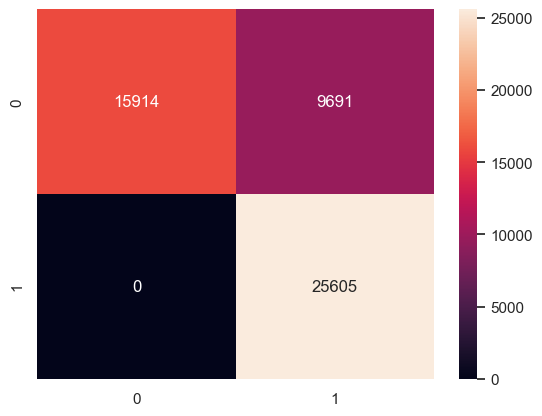

In [80]:
# make prediction
strt_time = time.time()
prediction = dbn3.predict(X_test, y_test)
stop_time = time.time()

print('\nEXE TIME')
total_time  = stop_time - strt_time
avg_time = total_time / X_test.shape[0]
print(f'Total Detection Time : {total_time:.6f}')
print(f'AVG Detection Time : {avg_time:.8f} \n')

# evaluation report 
class_report = classification_report(y_test, prediction['pre'])
conf_report = confusion_matrix(y_test, prediction['pre'])
print(class_report)
print('\n')
sn.heatmap(conf_report, fmt='d', annot=True)

In [81]:
tp, fp, fn, tn = conf_report.ravel()
metrics3 = compute_metrics(tp, fp, fn, tn, avg_time)
print(metrics3)
result3 = pd.Series(metrics3)
result3

{'TPR (Recall)': 1.0, 'FPR': 0.27456368993653674, 'FNR': 0.0, 'Accuracy': 0.8107596172622534, 'Precision': 0.621519234524507, 'Recall': 1.0, 'Specificity': 0.7254363100634633, 'AVG EXE TIME': '0.00005633'}


TPR (Recall)           1.0
FPR               0.274564
FNR                    0.0
Accuracy           0.81076
Precision         0.621519
Recall                 1.0
Specificity       0.725436
AVG EXE TIME    0.00005633
dtype: object

In [82]:
df_result = pd.DataFrame([result, result2, result3])
df_result

,TPR (Recall),FPR,FNR,Accuracy,Precision,Recall,Specificity,AVG EXE TIME
0,1.0,0.369211,0.0,0.707342,0.414685,1.0,0.630789,0.00003045
1,1.0,0.196555,0.0,0.877680,0.755360,1.0,0.803445,0.00005815
2,1.0,0.274564,0.0,0.810760,0.621519,1.0,0.725436,0.00005633


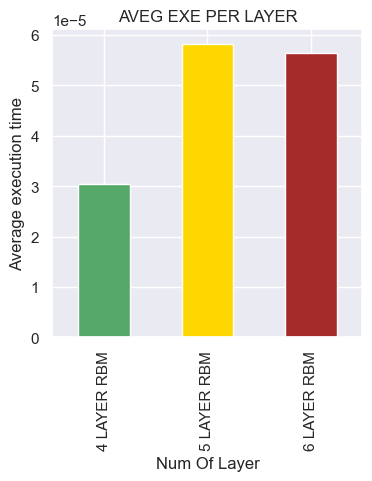

In [97]:
plt.figure(figsize=(4,4))
df_result['AVG EXE TIME'].astype('float16').plot(kind='bar', color=['g', 'gold', 'brown'])
plt.xticks(np.arange(3), labels=['4 LAYER RBM', '5 LAYER RBM', '6 LAYER RBM'])
plt.ylabel('Average execution time')
plt.xlabel('Num Of Layer')
plt.title('AVEG EXE PER LAYER')
plt.show()

<Figure size 400x400 with 0 Axes>

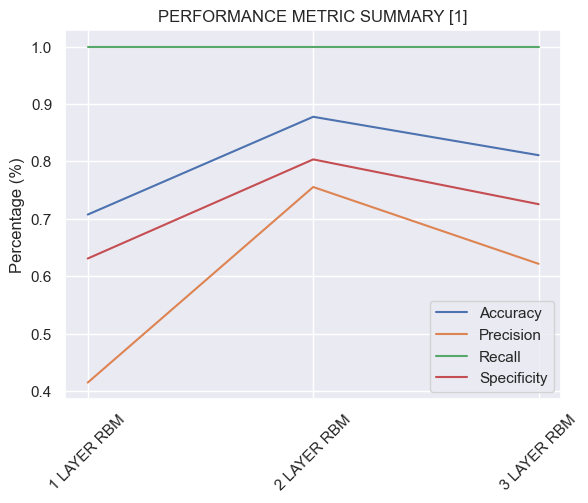

In [84]:
plt.figure(figsize=(4,4))
df_result[['Accuracy', 'Precision', 'Recall', 'Specificity']].plot()
plt.xticks(np.arange(3), labels=['1 LAYER RBM', '2 LAYER RBM', '3 LAYER RBM'], rotation=45)

plt.ylabel('Percentage (%)')
# plt.xlabel('Num Of Layer')
plt.title('PERFORMANCE METRIC SUMMARY [1]')
plt.show()

<Figure size 400x400 with 0 Axes>

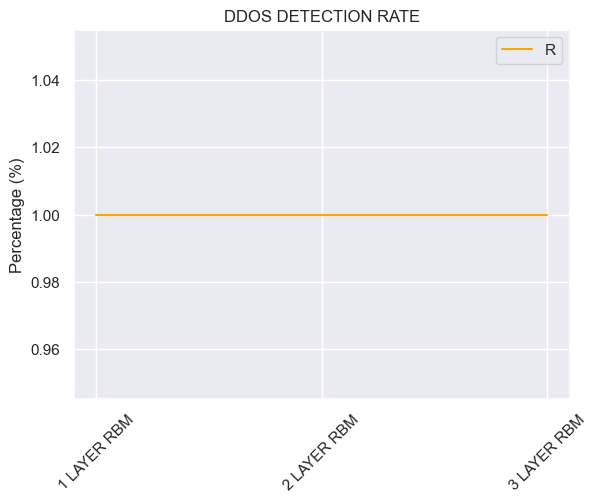

In [85]:
plt.figure(figsize=(4,4))
df_result[['TPR (Recall)']].plot(color='orange')
plt.xticks(np.arange(3), labels=['1 LAYER RBM', '2 LAYER RBM', '3 LAYER RBM'], rotation=45)
plt.legend(labels='R')
plt.ylabel('Percentage (%)')
# plt.xlabel('Num Of Layer')
plt.title('DDOS DETECTION RATE')
plt.show()

Index(['Accuracy', 'Precision', 'Recall'], dtype='object')


<Axes: >

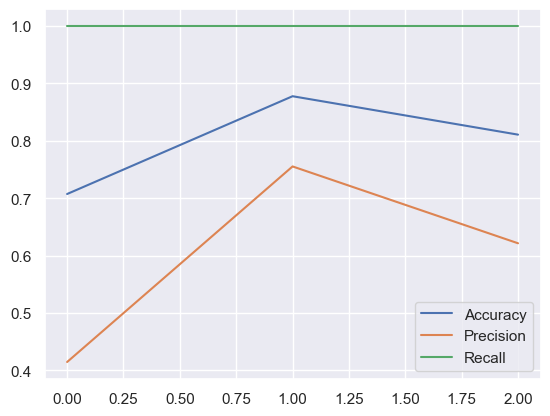

In [86]:
print(df_result.columns[3:6])
df_result[df_result.columns[3:6]].plot()